In [26]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [45]:
from albumentations import (
    VerticalFlip,
    HorizontalFlip,
    Flip,
    RandomCrop,
    RandomRotate90,
    Rotate,
    CenterCrop,
    RandomSizedCrop,
    ShiftScaleRotate,
    HueSaturationValue,
    Compose
)

In [28]:
def augment_and_show(aug, image):
    AUG = Compose(aug)
    image = AUG(image=image)['image']
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

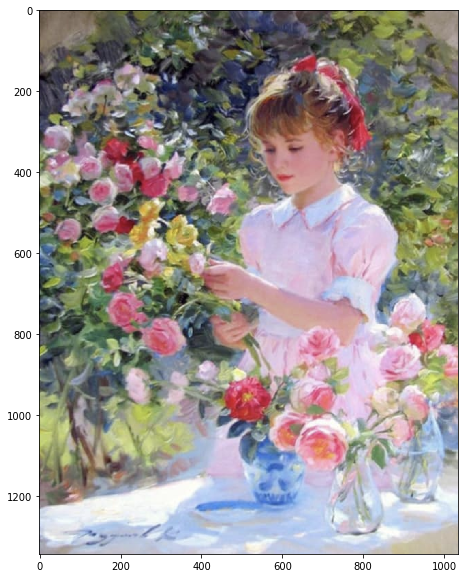

In [29]:
img_path = '/Users/singwanghyeon/Desktop/monet/12345.png'
image = cv2.imread(img_path)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

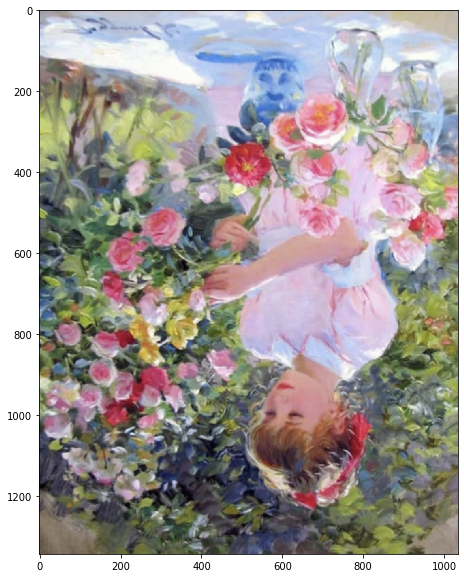

In [35]:
aug = [VerticalFlip(p=1.0)]
augment_and_show(aug, image)

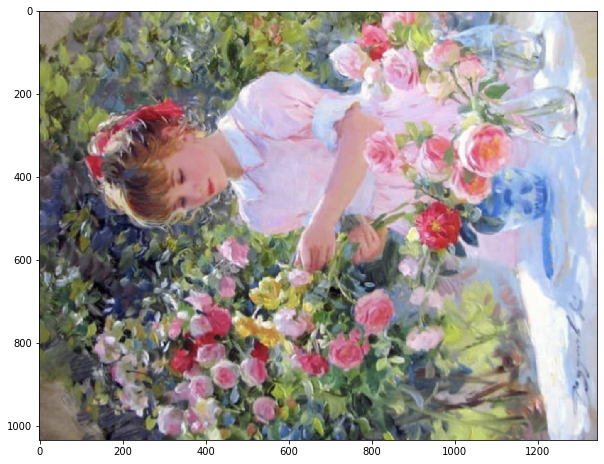

In [33]:
aug = [RandomRotate90(p=1.0)]
augment_and_show(aug, image)

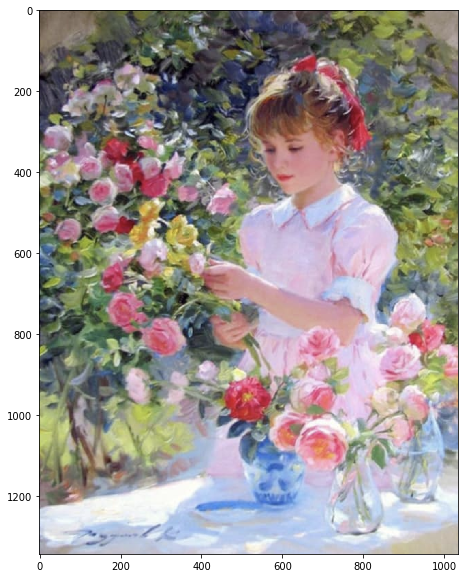

In [41]:
aug = [Flip(p=1.0),VerticalFlip(p=1.0)]
augment_and_show(aug, image)

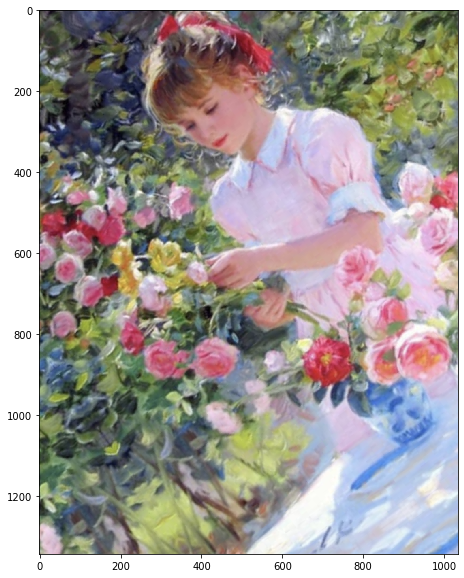

In [44]:
aug = [ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=1.0)]
augment_and_show(aug, image)

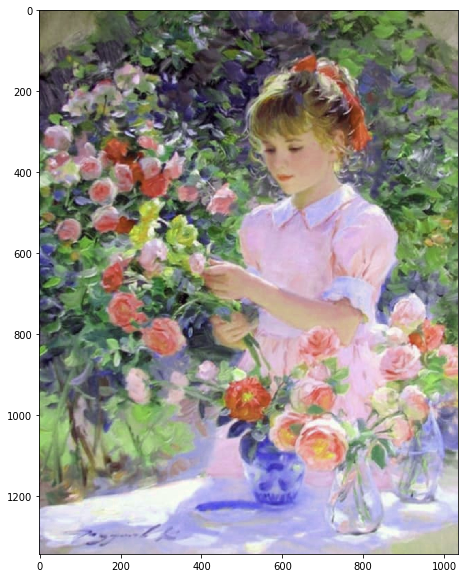

In [46]:
aug = [HueSaturationValue(p=1.0)]
augment_and_show(aug, image)

In [ ]:
'''
def strong_aug(p=.5):
    return Compose([
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomBrightnessContrast(),            
        ], p=0.3),
        HueSaturationValue(p=0.3),
    ], p=p)
'''